# Import Library

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

%matplotlib inline
rcParams['figure.figsize'] = 8, 5

# Generate Sin(x) Dataset

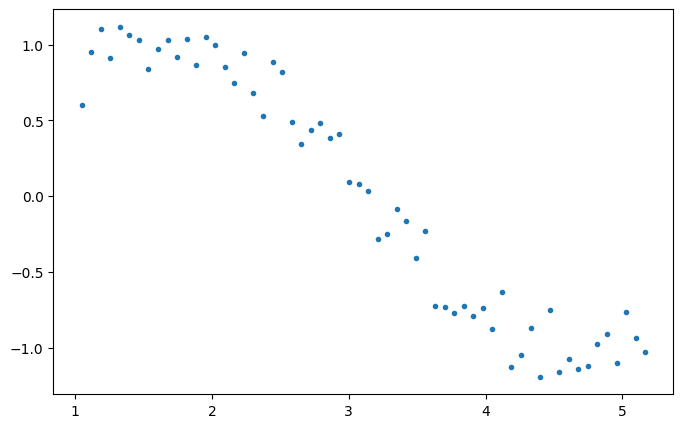

In [ ]:
# define input array with angles from 60deg to 300deg converted to radians
x = np.array([i * np.pi / 180 for i in range(60, 300, 4)])
np.random.seed(100)  # Setting seed for reproducability
y = np.sin(x) + np.random.normal(0, 0.15, len(x))

data = pd.DataFrame(np.column_stack([x, y]), columns=['x', 'y'])
plt.plot(data['x'], data['y'], '.')

# Generate New Features with higher power

In [ ]:
for i in range(2, 16):  # power of 1 is already there
    colname = 'x_%d' % i  # new var will be x_power
    data[colname] = data['x']**i
data.head()

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,1.047198,0.603561,1.096623,1.148381,1.202581,1.259340,1.318778,1.381021,1.446202,1.514459,1.585938,1.660790,1.739176,1.821260,1.907219,1.997235
1,1.117011,0.950196,1.247713,1.393709,1.556788,1.738948,1.942424,2.169709,2.423588,2.707173,3.023942,3.377775,3.773011,4.214494,4.707635,5.258479
2,1.186824,1.100139,1.408551,1.671702,1.984016,2.354677,2.794587,3.316683,3.936319,4.671717,5.544505,6.580351,7.809718,9.268760,11.000386,13.055521
3,1.256637,0.913191,1.579137,1.984402,2.493673,3.133642,3.937850,4.948448,6.218404,7.814277,9.819710,12.339811,15.506664,19.486248,24.487142,30.771450
4,1.326450,1.117494,1.759470,2.333850,3.095735,4.106339,5.446854,7.224981,9.583578,12.712139,16.862020,22.366630,29.668222,39.353420,52.200353,69.241170


# 0. Function definition

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
#　調整參數造成收斂不完全，省略警告
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def example_regression(data, power, plot_dict, reg_type, alpha, var):
    # define estimator object
    type_dict = {
        'Linear': LinearRegression(),
        'Lasso': Lasso(alpha=alpha),
        'Ridge': Ridge(alpha=alpha)
    }
    if var == 'power':
        # generate X in order
        X = ['x']
        if power >= 2:
            X.extend(['x_%d' % i for i in range(2, power + 1)])

        # fit the model
        if reg_type in type_dict:
            model = type_dict[reg_type]
        model.fit(data[X], data['y'])
        y_pred = model.predict(data[X])

        # check if a plot is to be made for the entered power
        if power in plot_dict:
            plt.subplot(plot_dict[power])
            plt.tight_layout()
            plt.plot(data['x'], data['y'], '.')
            plt.plot(data['x'], y_pred)
            plt.title('Plot for power: %d' % power)

        # return the result in pre-defined format
        rss = sum((y_pred - data['y'])**2)
        ret = [rss]
        ret.extend([model.intercept_])
        ret.extend(model.coef_)
    elif var == 'alpha':
        # generate X in order
        X = ['x']
        if power >= 2:
            X.extend(['x_%d' % i for i in range(2, power + 1)])

        # fit the model
        if reg_type in type_dict:
            model = type_dict[reg_type]
        model.fit(data[X], data['y'])
        y_pred = model.predict(data[X])

        # check if a plot is to be made for the entered power
        if alpha in plot_dict:
            plt.subplot(plot_dict[alpha])
            plt.tight_layout()
            plt.plot(data['x'], data['y'], '.')
            plt.plot(data['x'], y_pred)
            plt.title('Plot for alpha: %.3f' % alpha)

        # return the result in pre-defined format
        rss = sum((y_pred - data['y'])**2)
        ret = [rss]
        ret.extend([model.intercept_])
        ret.extend(model.coef_)
    return ret

# Lasso Regularization with Varied power

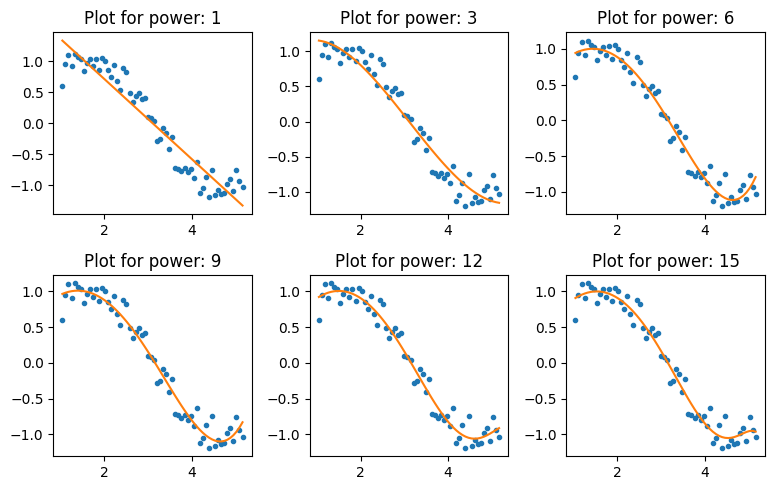

In [ ]:
# initialize a dataframe to store the results:
col = ['rss', 'intercept'] + ['coef_x_%d' % i for i in range(1, 16)]
ind = ['power_%d' % i for i in range(1, 16)]

perf_Lasso = pd.DataFrame(index=ind, columns=col)

# define the powers for which a plot is required: {power:where}
plot_dict = {1: 231, 3: 232, 6: 233, 9: 234, 12: 235, 15: 236}

# iterate through all powers and assimilate results
for i in range(1, 16):
    perf_Lasso.iloc[i - 1, 0:i + 2] = example_regression(data,
                                                         power=i,
                                                         plot_dict=plot_dict,
                                                         reg_type='Lasso',
                                                         alpha=1e-3,
                                                         var='power')


In [ ]:
pd.options.display.float_format = '{:,.2g}'.format
perf_Lasso

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
power_1,3.7,2,-0.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power_2,3.7,1.8,-0.52,-0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power_3,2.1,0.81,0.8,-0.51,0.055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power_4,1.2,-0.034,1.5,-0.55,-0.013,0.011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power_5,1.1,0.019,1.3,-0.4,-0.027,0.0029,0.0013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power_6,1.2,0.25,1,-0.3,-0.025,0.00098,0.00062,0.00012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power_7,1.2,0.37,0.88,-0.27,-0.023,0.00082,0.00049,8.5e-05,8.7e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power_8,1.2,0.38,0.88,-0.28,-0.023,0.00097,0.00051,8.6e-05,8.4e-06,-2.6e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power_9,1.2,0.33,0.94,-0.29,-0.024,0.001,0.00055,9.9e-05,1.1e-05,3.3e-07,-2.8e-07,NaN,NaN,NaN,NaN,NaN,NaN
power_10,1.1,0.25,1,-0.31,-0.026,0.00089,0.00057,0.00011,1.5e-05,1.1e-06,-1.2e-07,-7.9e-08,NaN,NaN,NaN,NaN,NaN


# Lasso Regularization with Varied Alpha

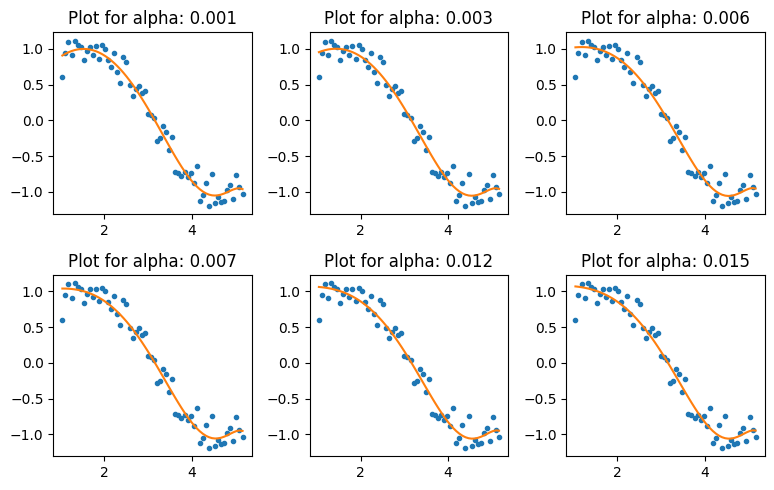

In [ ]:
# initialize a dataframe to store the results:
col = ['rss', 'intercept'] + ['coef_x_%d' % i for i in range(1, 16)]
ind = ['alpha_%de-3' % i for i in range(1, 16)]

perf_Lasso = pd.DataFrame(index=ind, columns=col)

# define the alpha for which a plot is required: {alpha:where}
plot_dict = {
    1e-3: 231,
    3e-3: 232,
    6e-3: 233,
    7e-3: 234,
    12e-3: 235,
    15e-3: 236
}  # key值為alpha的值

# iterate through all powers and assimilate results
for i in range(1, 16):
    perf_Lasso.iloc[i - 1, 0:18] = example_regression(data,
                                                      power=15,
                                                      plot_dict=plot_dict,
                                                      reg_type='Lasso',
                                                      alpha=i * 1e-3,
                                                      var='alpha')

In [ ]:
pd.options.display.float_format = '{:,.2g}'.format
perf_Lasso

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-3,1,0.13,1.1,-0.29,-0.03,-0.0003,0.00038,9.7e-05,1.7e-05,2.6e-06,3.3e-07,3.3e-08,9.8e-10,-6.7e-10,-2.7e-10,-7.3e-11,-1.7e-11
alpha_2e-3,1.1,0.29,0.88,-0.22,-0.037,-0.00069,0.00037,0.0001,1.8e-05,2.7e-06,3.5e-07,3.5e-08,1.2e-09,-6.6e-10,-2.7e-10,-7.5e-11,-1.8e-11
alpha_3e-3,1.1,0.45,0.69,-0.14,-0.043,-0.0011,0.00035,0.0001,1.9e-05,2.8e-06,3.7e-07,3.7e-08,1.5e-09,-6.5e-10,-2.7e-10,-7.6e-11,-1.8e-11
alpha_4e-3,1.1,0.61,0.49,-0.073,-0.05,-0.0015,0.00034,0.0001,1.9e-05,3e-06,3.9e-07,4e-08,1.7e-09,-6.4e-10,-2.8e-10,-7.8e-11,-1.9e-11
alpha_5e-3,1.1,0.77,0.29,-0.00084,-0.057,-0.0019,0.00032,0.00011,2e-05,3.1e-06,4.1e-07,4.2e-08,2e-09,-6.3e-10,-2.8e-10,-8e-11,-1.9e-11
alpha_6e-3,1.1,0.86,0.19,0.023,-0.056,-0.0024,0.00029,0.00011,2e-05,3.2e-06,4.2e-07,4.4e-08,2.2e-09,-6.2e-10,-2.9e-10,-8.1e-11,-2e-11
alpha_7e-3,1.2,0.95,0.097,0.047,-0.055,-0.003,0.00025,0.00011,2.1e-05,3.2e-06,4.3e-07,4.7e-08,2.5e-09,-5.9e-10,-2.9e-10,-8.2e-11,-2e-11
alpha_8e-3,1.2,1,0,0.072,-0.054,-0.0035,0.00021,0.00011,2.1e-05,3.3e-06,4.5e-07,4.9e-08,2.8e-09,-5.6e-10,-2.9e-10,-8.3e-11,-2e-11
alpha_9e-3,1.2,1,0,0.069,-0.051,-0.0039,0.00019,0.00011,2.1e-05,3.4e-06,4.6e-07,5e-08,2.9e-09,-5.6e-10,-2.9e-10,-8.4e-11,-2.1e-11
alpha_10e-3,1.2,1,0,0.064,-0.049,-0.0042,0.00017,0.00011,2.1e-05,3.4e-06,4.7e-07,5.1e-08,3e-09,-5.6e-10,-2.9e-10,-8.5e-11,-2.1e-11


# Ridge Regularization with Varied power

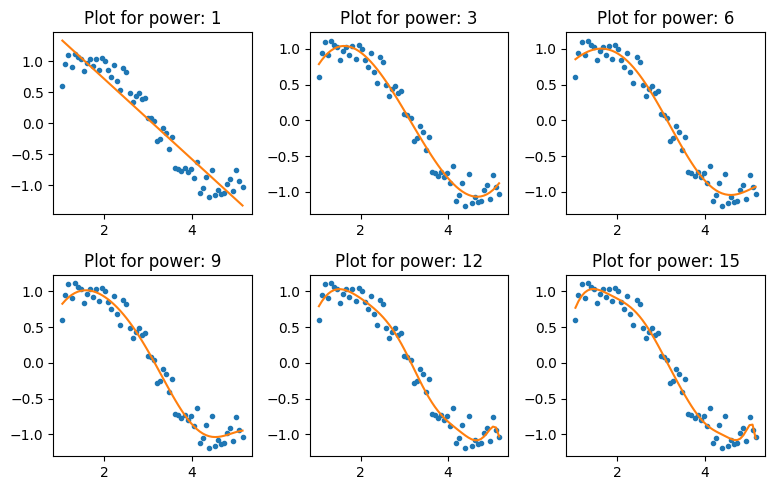

In [ ]:
# initialize a dataframe to store the results:
col = ['rss', 'intercept'] + ['coef_x_%d' % i for i in range(1, 16)]
ind = ['power_%d' % i for i in range(1, 16)]

perf_Ridge = pd.DataFrame(index=ind, columns=col)

# define the powers for which a plot is required: {power:where}
plot_dict = {1: 231, 3: 232, 6: 233, 9: 234, 12: 235, 15: 236}

# iterate through all powers and assimilate results
for i in range(1, 16):
    perf_Ridge.iloc[i - 1, 0:i + 2] = example_regression(data,
                                                         power=i,
                                                         plot_dict=plot_dict,
                                                         reg_type='Ridge',
                                                         alpha=1e-3,
                                                         var='power')

In [ ]:
pd.options.display.float_format = '{:,.2g}'.format
perf_Ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
power_1,3.7,2,-0.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power_2,3.7,1.9,-0.54,-0.017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power_3,1.1,-1.4,3.4,-1.4,0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power_4,1.1,-0.96,2.7,-1,0.056,0.0075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power_5,1,0.27,0.014,1.1,-0.73,0.14,-0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power_6,1,0.036,1.1,-0.51,0.32,-0.19,0.043,-0.0031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power_7,1,-0.55,1.7,0.16,-0.98,0.58,-0.18,0.027,-0.0017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power_8,1,-0.48,1.6,0.18,-0.79,0.39,-0.088,0.0063,0.00091,-0.00013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power_9,1,-0.66,1.6,0.47,-0.75,-0.14,0.39,-0.19,0.045,-0.0051,0.00023,NaN,NaN,NaN,NaN,NaN,NaN
power_10,1,-1.2,2.4,0.83,-1.4,-0.67,1.6,-1,0.33,-0.06,0.0058,-0.00024,NaN,NaN,NaN,NaN,NaN


# Ridge Regularization with Varied Alpha¶

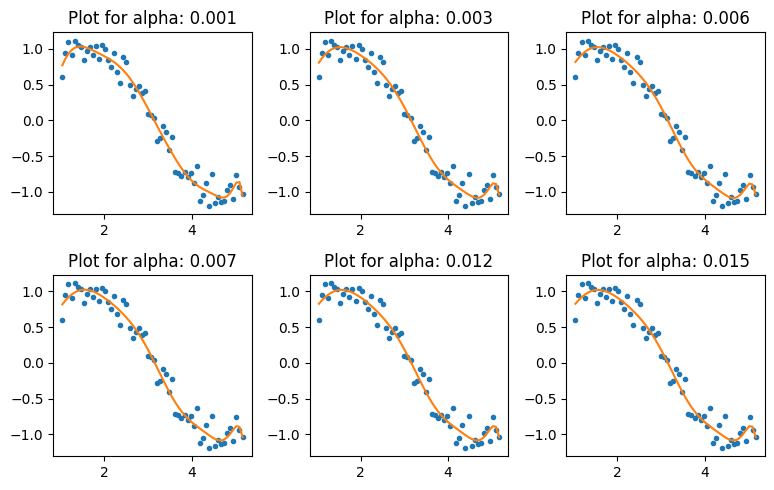

In [ ]:
# initialize a dataframe to store the results:
col = ['rss', 'intercept'] + ['coef_x_%d' % i for i in range(1, 16)]
ind = ['alpha_%de-3' % i for i in range(1, 16)]

perf_Ridge = pd.DataFrame(index=ind, columns=col)

# define the alpha for which a plot is required: {power:where}
plot_dict = {
    1e-3: 231,
    3e-3: 232,
    6e-3: 233,
    7e-3: 234,
    12e-3: 235,
    15e-3: 236
}  # key值為alpha的值
# iterate through all alphas and assimilate results
for i in range(1, 16):
    perf_Ridge.iloc[i - 1, 0:18] = example_regression(data,
                                                      power=15,
                                                      plot_dict=plot_dict,
                                                      reg_type='Ridge',
                                                      alpha=i * 1e-3,
                                                      var='alpha')

In [ ]:
pd.options.display.float_format = '{:,.2g}'.format
perf_Ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-3,0.95,-2,1.9,1.9,0.48,-1.2,-1.5,0.35,2.5,-2.7,1.2,-0.25,0.0048,0.0093,-0.0021,0.00021,-7.8e-06
alpha_2e-3,0.96,-0.94,1.1,1,0.25,-0.51,-0.55,0.07,0.46,-0.016,-0.36,0.29,-0.11,0.025,-0.0033,0.00025,-8.1e-06
alpha_3e-3,0.96,-0.63,0.94,0.88,0.16,-0.51,-0.45,0.24,0.46,-0.5,0.21,-0.039,-0.0006,0.0019,-0.0004,3.8e-05,-1.5e-06
alpha_4e-3,0.96,-0.52,0.76,0.78,0.27,-0.31,-0.44,-0.033,0.35,0.061,-0.33,0.23,-0.085,0.018,-0.0024,0.00018,-5.8e-06
alpha_5e-3,0.97,-0.26,0.63,0.61,0.17,-0.26,-0.27,0.072,0.18,-0.1,-0.00096,0.018,-0.0073,0.0015,-0.00019,1.3e-05,-4.4e-07
alpha_6e-3,0.97,-0.16,0.54,0.54,0.17,-0.19,-0.23,0.015,0.12,0.0084,-0.072,0.042,-0.012,0.0021,-0.00022,1.3e-05,-3.7e-07
alpha_7e-3,0.97,-0.12,0.5,0.52,0.19,-0.17,-0.24,-0.0096,0.16,-0.0098,-0.07,0.045,-0.014,0.0025,-0.00027,1.8e-05,-5.3e-07
alpha_8e-3,0.97,-0.068,0.47,0.49,0.18,-0.16,-0.23,0.0035,0.15,-0.047,-0.022,0.017,-0.0046,0.00062,-4.3e-05,1.5e-06,-4e-08
alpha_9e-3,0.97,-0.027,0.43,0.46,0.19,-0.13,-0.21,-0.028,0.12,0.017,-0.07,0.037,-0.0097,0.0015,-0.00013,6.8e-06,-1.8e-07
alpha_10e-3,0.97,0.034,0.35,0.39,0.21,-0.017,-0.14,-0.14,-0.063,0.38,-0.33,0.15,-0.037,0.006,-0.00058,3.2e-05,-7.7e-07
